# Introduction

Une valeur de $x$ solution de $f(x) = 0$ est appelée une racine ou un zéro de la fonction.

Nous avons tous appris au secondaire comment résoudre l’équation du second degré, certains ont également vu comment calculer les racines d’une équation du troisième ordre et se souviennent que la formule est beaucoup plus complexe. On peut aussi obtenir une formule générale pour le quatrième degré. Par contre, on ignore souvent qu’il n’existe pas de formule permettant de trouver les racines des polynômes de degré plus grand ou égal à 5. 

Puisqu’il n’existe pas de formule générale pour des fonctions aussi simples que des polynômes, il est peu probable que l’on puisse résoudre analytiquement l’équation $f(x)=0$ dans tous les cas qui nous intéressent. Il faudra donc recourir aux méthodes numériques pour une approximation des zéros d’une fonction qui consistent en la construction d’une suite $(x_n)_{n \in \mathbb{N}}$ qui converge vers $x^*$ l’un des zéros de la fonction.

Pour l’utilisation pratique d’une telle méthode il faut introduire un critère d’arrêt pour interrompre le processus itératif lorsque l’approximation de $x^*$ par $x_n$ est jugée satisfaisante. Pour cela, il faut imposer une tolérance $\varepsilon > 0$ sur la différence $|x_{n+1} − x_n | < \varepsilon$ ou sur la valeur $|f(x_n)| < \varepsilon$.

# Méthode de dichotomie 

(dite aussi de $bissection$) est inspiré du théorème suivant :
        
$Th\acute{e}or\grave{e}me$

Soit $f : [x_1, x_2] \rightarrow \mathbb{R}$ une fonction continue.

Si $f(x_1)f(x_2) \leq 0$, alors il existe $x^* \in [x_1, x_2]$ tel que $f(x^*) = 0$. 

Si de plus $f$ est strictement monotone sur $[x_1, x_2]$, alors cette racine est unique.

## Principe

Étant donné un intervalle $[x1,x2]$ pour lequel $f(x)$ possède un changement de signe.

À chaque itération, on réduit la longueur de l’intervalle contenant $x^*$ en le divisant en deux. Pour cela on calcule l'abscisse au milieu $x_m=\frac{x_1+x_2}{2}$ et son image  $f(x_m)$ :

- Si $f(x_1)f(x_m)<0$, alors $x_2=x_m$

- Sinon, $f(x_m)f(x_2)<0$, alors $x_1=x_m$

et on recherche sur le nouvel intervalle $[x_1, x_2]$ jusqu'à ce que :

- le critère d'arrêt soit satisfait (convergence atteinte) et on renvoie le résultat trouvé.

- le nombre d'itérations maximal soit atteint (convergence non atteinte).

## Interprétation géométrique
<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{illustration1.png}
\end{figure}
-->

<div>
    <img src="illustration1.png" width="500"/>
</div>


## Code Python

In [1]:
def dichotomie(f, x1, x2, tolérance=1e-6):
    nombre_itération = 0
    milieu = (x1+x2)/2
    xn = []
    while nombre_itération < 1000 and abs(x2-x1)>tolérance :
        nombre_itération += 1
        xn.append(milieu)
        if f(x1)*f(milieu)<0:
            x2 = milieu
        elif f(x2)*f(milieu)<0:
            x1 = milieu
        elif f(milieu) == 0 :
            break             # la racine est le milieu
        else:
            return None       # on renvoie rien si le produit est positif
        milieu = (x1+x2)/2
    return xn

La fonction renvoie une suite $x_n$ qui converge vers la racine appartenant à $[x1, x2]$ s'il existe. Plus la tolérance est petite, plus les valeurs sont proches de la racine.

## Exemple 1

Soit $f_1(x) = (x-1)(x-2)(x-3)$ :

In [15]:
def f1(x):
    return (x-1)*(x-2)*(x-3)

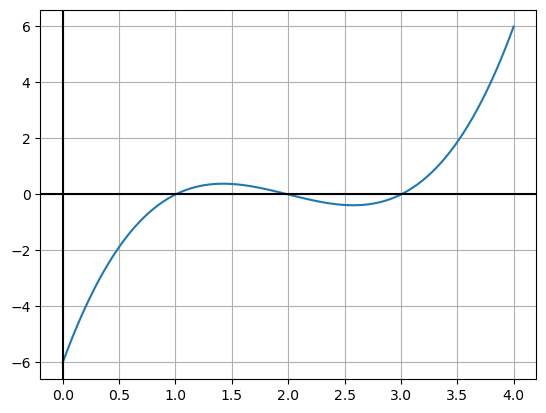

In [16]:
import matplotlib.pyplot as mpl
import numpy as np

x = np.linspace(0, 4, 100)
mpl.plot(x, f1(x))
mpl.grid()
mpl.axvline(color="black")
mpl.axhline(color="black")

La fonction a clairement 3 racines 1, 2 et 3. En testant la méthode de dichotomie sur l'intervalle $[0, \frac{3}{2}]$ où la fonction change de signe :

In [4]:
dichotomie(f1, 0, 1.5)

[0.75,
 1.125,
 0.9375,
 1.03125,
 0.984375,
 1.0078125,
 0.99609375,
 1.001953125,
 0.9990234375,
 1.00048828125,
 0.999755859375,
 1.0001220703125,
 0.99993896484375,
 1.000030517578125,
 0.9999847412109375,
 1.0000076293945312,
 0.9999961853027344,
 1.0000019073486328,
 0.9999990463256836,
 1.0000004768371582,
 0.9999997615814209]

on constate que la suite converge vers la racine $1$ qui appartient à $[0, \frac{3}{2}]$.

## Exemple 2

On souhaite calculer $\sqrt 2$. Cela revient à résoudre $f_2(x)=x^2 − 2 = 0$

Cette fonction présente un changement de signe dans l’intervalle $[1 , 2]$ car $f_2(1)=-1<0$ et $f_2(2)=2>0$.

In [6]:
def f2(x):
    return x**2-2
            
dichotomie(f2, 1, 2)

[1.5,
 1.25,
 1.375,
 1.4375,
 1.40625,
 1.421875,
 1.4140625,
 1.41796875,
 1.416015625,
 1.4150390625,
 1.41455078125,
 1.414306640625,
 1.4141845703125,
 1.41424560546875,
 1.414215087890625,
 1.4141998291015625,
 1.4142074584960938,
 1.4142112731933594,
 1.4142131805419922,
 1.4142141342163086]

## Convergence et divergence 

On remarque aisément que la longueur de l’intervalle entourant la racine est divisée par deux à chaque itération. Cette constatation permet de déterminer à l’avance le nombre d’itérations nécessaire pour obtenir une certaine erreur $|x^* - x_m|$ sur la racine.

Si l’algorithme de dichotomie arrive jusqu’à l’étape $n$ alors on a l’estimation : $$|x^* − x_{m_n}| \leq \frac{x_2 − x_1}{2^{n}}$$

Par conséquent, la suite $(x_{m_n})$ converge vers $x^*$, donc on peut choisir une valeur $\varepsilon > 0$, et on renvoie $x_{m_n}$ dès que $|x^* − x_{m_n}| < \varepsilon$

La convergence de la méthode de la bissection n’est pas très rapide, mais elle est sûre à partir du moment où on a un intervalle avec changement de signe.

Il existe des cas où la méthode de la bissection ne fonctionne pas. 

- La première situation critique est celle où $f(x)$ est tangente à l’axe des $x$ et ne présente donc pas de changement de signe. 

<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{cp1d.png}
\end{figure}
-->

<div>
    <img src="cp1d.png" width="300"/>
</div>

- Il y a aussi celle où deux racines (ou un nombre pair de racines) sont présentes dans l’intervalle de départ ; en ce cas, il n’y a toujours pas de changement de signe.

<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{cp2d.png}
\end{figure}
-->

<div>
    <img src="cp2d.png" width="300"/>
</div>

- Enfin, si l’intervalle de départ contient un nombre impair de racines, $f(x)$ change de signe, mais l’algorithme peut avoir des difficultés à choisir parmi ces racines. On peut assez facilement éviter ces écueils en illustrant graphiquement $f(x)$ dans l’intervalle d’intérêt.

<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{cp3d.png}
\end{figure}
-->

<div>
    <img src="cp3d.png" width="300"/>
</div>

# Méthode de Newton-Raphson

La méthode de $Newton-Raphson$ est l’une des méthodes les plus utilisées pour la résolution des équations non linéaires.

## Principe

Soit $f$ une fonction dérivable.

Étant donné un point initial $(x_0, f(x_0))$, à chaque itération, on calcule $x_1 = x_0 − \frac{f(x_0)}{f'(x_0)}$ qui représente l’abscisse du point d’intersection de la tangente de $f$ en $x_0$ avec l’axe des abscisses.

On reprend ensuite le même raisonnement à partir du point $(x1,f(x1))$ et ainsi de suite jusqu'à ce que :

- le critère d'arrêt soit satisfait (convergence atteinte) et on renvoie le résultat trouvé.

- le nombre d'itérations maximal soit atteint (convergence non atteinte).


Ce processus conduit à la définition d’une suite récurrente :

$$
\left\{
    \begin{array}{ll}
        x_0 \in bassin \hspace{3pt} d'attraction \hspace{3pt}d'une \hspace{3pt}racine\\
        x_{n+1} = x_n − \frac{f(x_n)}{f'(x_n)}
    \end{array}
\right.
$$

Où le bassin d'attraction représente l'ensemble des valeurs initiales pour lesquelles la suite $x_n$ tend vers cette racine.

## Interprétation géométrique

<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{illustration2.png}
\end{figure}
-->

<div>
    <img src="illustration2.png" width="500"/>
</div>

## Code Python

In [7]:
def newton_raphson(f, df, x0, tolérance=1e-7):
    nombre_itérarion = 0
    xn = []
    while nombre_itérarion < 1000 and abs(f(x0))>tolérance:
        xn.append(x0)
        nombre_itérarion += 1
        x0 = x0 - f(x0)/df(x0)
    return xn

La fonction renvoie une suite $x_n$ qui converge vers une racine à partir d'un point initial $x_0$.

## Exemple 1

On cherche à résoudre l’équation $f_3(x) = e^{−x} − x = 0$. Pour utiliser la méthode de $Newton-Raphson$, calculons la dérivée de cette fonction, qui est $f_3'(x) = −e^{−x} − 1$. L’algorithme se résume à :

$$x_{n+1} = x_n − \frac{f_3(x_n)}{f_3'(x_n)} = x_n − \frac{e^{−x} −x}{−e^{−x} − 1}$$

In [8]:
def f3(x):
    return np.exp(-x)-x

def df3(x):
    return -np.exp(-x)-1

newton_raphson(f3, df3, 0)

[0, 0.5, 0.5663110031972182, 0.5671431650348622]

## Exemple 2

On reprend l’exemple où l’on doit calculer $\sqrt 2$ en résolvant $f_2(x)=x^2-2=0$ :

In [9]:
def f2(x):
    return x**2-2

def df2(x):
    return 2*x

newton_raphson(f2, df2, 2)

[2, 1.5, 1.4166666666666667, 1.4142156862745099]

On peut remarquer la convergence rapide de cette méthode.


## Convergence et divergence 

La convergence de la méthode de $Newton-Raphson$ dépend de la valeur initiale $x_0$. Malgré ses belles propriétés de convergence, une mauvaise valeur initiale peut provoquer la divergence de cette méthode. Dans l’exemple de la figure, une valeur de $x_0$ plus près de la racine $r$ permettrait de retrouver la convergence.

<!---
\begin{figure}[H]
\centering
\includegraphics[scale=0.55]{cpn.png}
\end{figure}
-->

<div>
    <img src="cpn.png" width="500"/>
</div>

\newpage

# TP

## Énoncé

***Exercice 1***


Soit $$f_1(x)= (x-3)(x+3)$$ et $$f_2(x) = sin(x)+sin(2x)+sin(3x)$$

1. Écrire et représenter graphiquement $f_1$ sur $[-5,5]$.

2. Écrire et représenter graphiquement $f_2$ sur $[−\pi, \pi]$.

***Exercice 2***

1. Écrire une fonction $dichotomie(f, x1, x2, epsilon)$ qui renvoie une solution approchée de $f(x)=0$ sur l'intervalle $[x1, x2]$ avec une tolérance $epsilon$.


2. Tester la fonction $dichotomie$ sur la fonction $f_1$ sur les intervalles $[-4,-1]$ et $[1,4]$ et comparer le résultat  renvoyé avec les solutions analytiques de $f_1(x) = 0$.

3. Refaire le même travail avec la fonction $f_2$ sur différents intervalles dans $[−\pi, \pi]$.

***Exercice 3***

1. Écrire une fonction $newton\_raphson(f,df,x0,epsilon)$ qui, à partir d'un point $x0$, renvoie une solution approchée de $f(x)=0$ en utilisant sa dérivée $df$, avec une tolérance $epsilon$.

2. Tester la fonction $newton\_raphson$ avec $1$ et $-1$ comme points de départ sur $f_1$, et 3 et -3 sur $f_2$ en calculant d’abord les dérivées.

## Résolution

***Exercice 1***

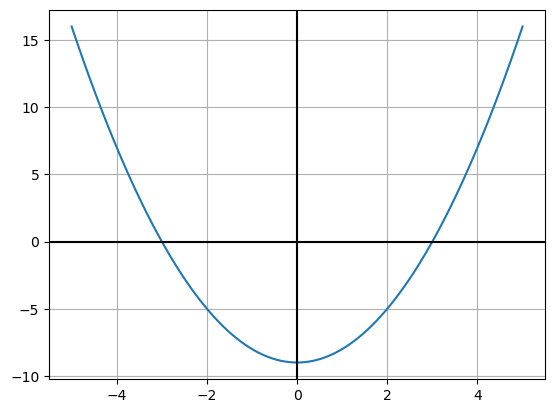

In [12]:
# 1

def f1(x):
    return (x-3)*(x+3)

x = np.linspace(-5, 5, 100)
mpl.plot(x, f1(x))
mpl.grid()
mpl.axvline(color="black")
mpl.axhline(color="black")

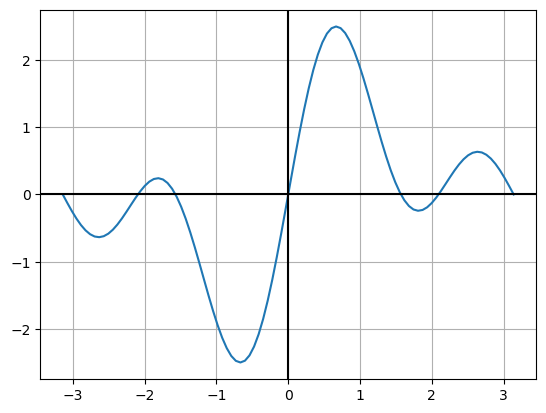

In [17]:
# 2

def f2(x):
    return np.sin(x)+np.sin(2*x)+np.sin(3*x)

x = np.linspace(-np.pi, np.pi,100)
mpl.plot(x, f2(x))
mpl.grid()
mpl.axvline(color="black")
mpl.axhline(color="black")

***Exercice 2***

In [11]:
# 1

def dichotomie(f, x1, x2, tolérance=1e-6):
    nombre_itération = 0
    milieu = (x1+x2)/2
    xn = []
    while nombre_itération < 1000 and abs(x2-x1)>tolérance :
        nombre_itération += 1
        xn.append(milieu)
        if f(x1)*f(milieu)<0:
            x2 = milieu
        elif f(x2)*f(milieu)<0:
            x1 = milieu
        elif f(milieu) == 0 :
            break             # la racine est le milieu
        else:
            return None       # on renvoie rien si le produit est positif
        milieu = (x1+x2)/2
    return xn

In [12]:
# 2.1

dichotomie(f1, -4, -1)

[-2.5,
 -3.25,
 -2.875,
 -3.0625,
 -2.96875,
 -3.015625,
 -2.9921875,
 -3.00390625,
 -2.998046875,
 -3.0009765625,
 -2.99951171875,
 -3.000244140625,
 -2.9998779296875,
 -3.00006103515625,
 -2.999969482421875,
 -3.0000152587890625,
 -2.9999923706054688,
 -3.0000038146972656,
 -2.999998092651367,
 -3.0000009536743164,
 -2.999999523162842,
 -3.000000238418579]

On voit clairement que la suite converge vers la racine $-3 \in [-4,-1]$.

In [13]:
# 2.2

dichotomie(f1, 1, 4)

[2.5,
 3.25,
 2.875,
 3.0625,
 2.96875,
 3.015625,
 2.9921875,
 3.00390625,
 2.998046875,
 3.0009765625,
 2.99951171875,
 3.000244140625,
 2.9998779296875,
 3.00006103515625,
 2.999969482421875,
 3.0000152587890625,
 2.9999923706054688,
 3.0000038146972656,
 2.999998092651367,
 3.0000009536743164,
 2.999999523162842,
 3.000000238418579]

vers la racine $3 \in [1,4]$.

In [14]:
# 3.1

dichotomie(f2, 1, 2)

[1.5,
 1.75,
 1.625,
 1.5625,
 1.59375,
 1.578125,
 1.5703125,
 1.57421875,
 1.572265625,
 1.5712890625,
 1.57080078125,
 1.570556640625,
 1.5706787109375,
 1.57073974609375,
 1.570770263671875,
 1.5707855224609375,
 1.5707931518554688,
 1.5707969665527344,
 1.5707950592041016,
 1.570796012878418]

vers la racine $\frac{\pi}{2} \in [1,2]$.

In [15]:
# 3.2

dichotomie(f2, -3, -2)

[-2.5,
 -2.25,
 -2.125,
 -2.0625,
 -2.09375,
 -2.109375,
 -2.1015625,
 -2.09765625,
 -2.095703125,
 -2.0947265625,
 -2.09423828125,
 -2.094482421875,
 -2.0943603515625,
 -2.09442138671875,
 -2.094390869140625,
 -2.0944061279296875,
 -2.0943984985351562,
 -2.0943946838378906,
 -2.0943965911865234,
 -2.094395637512207]

vers la racine $-\frac{2\pi}{3} \in [-3,-2]$.

***Exercice 3***

In [16]:
# 1

def newton_raphson(f, df, x0, epsilon=1e-7):
    nombre_itérarion = 0
    xn = []
    while nombre_itérarion < 1000 and abs(f(x0))>epsilon:
        xn.append(x0)
        nombre_itérarion += 1
        x0 = x0 - f(x0)/df(x0)
    return xn

In [17]:
# 2.1

# d'abord, on calcule la dérivé
def df1(x):
    return 2*x+1

newton_raphson(f1,df1,1)

[1,
 3.6666666666666665,
 3.1333333333333333,
 3.020795107033639,
 3.003014595121962,
 3.0004315829728374,
 3.0000616737145784,
 3.0000088109187746,
 3.0000012587106037,
 3.000000179815962,
 3.000000025687998]

vers la racine $3$.

In [18]:
newton_raphson(f1,df1,-1)

[-1,
 -9.0,
 -4.764705882352941,
 -3.158215010141988,
 -2.974948787024447,
 -3.0051877389103416,
 -2.9989699721511522,
 -3.000206302760279,
 -2.999958751363993,
 -3.0000082502036154,
 -2.9999983499783354,
 -3.0000003300050953,
 -2.9999999339990113]

vers la racine $-3$.

In [19]:
# 2.2

def df2(x):
    return 6*np.cos(x)

newton_raphson(f2,df2,-3)

[-3,
 -3.0460984967130194,
 -3.0775919117701878,
 -3.098823636372409,
 -3.113049563973081,
 -3.122554885477871,
 -3.128898125069986,
 -3.1331288390407215,
 -3.1359498747715957,
 -3.137830731172589,
 -3.1390846846076847,
 -3.1399206681337146,
 -3.140477994801372,
 -3.1408495471922646,
 -3.141097249165194,
 -3.1412623839261107,
 -3.1413724737999953,
 -3.1414458670591103,
 -3.1414947959014414,
 -3.1415274151305272,
 -3.141549161283508,
 -3.141563658718904,
 -3.141573323675858,
 -3.1415797669805,
 -3.1415840625169302,
 -3.1415869262078844,
 -3.1415888353351873,
 -3.1415901080867226,
 -3.1415909565877462,
 -3.141591522255095,
 -3.141591899366661,
 -3.141592150774372,
 -3.1415923183795122,
 -3.1415924301162725,
 -3.141592504607446,
 -3.141592554268229,
 -3.141592587375417]

vers la racine $-\pi$.

In [20]:
newton_raphson(f2,df2,3)

[3,
 3.0460984967130194,
 3.0775919117701878,
 3.098823636372409,
 3.113049563973081,
 3.122554885477871,
 3.128898125069986,
 3.1331288390407215,
 3.1359498747715957,
 3.137830731172589,
 3.1390846846076847,
 3.1399206681337146,
 3.140477994801372,
 3.1408495471922646,
 3.141097249165194,
 3.1412623839261107,
 3.1413724737999953,
 3.1414458670591103,
 3.1414947959014414,
 3.1415274151305272,
 3.141549161283508,
 3.141563658718904,
 3.141573323675858,
 3.1415797669805,
 3.1415840625169302,
 3.1415869262078844,
 3.1415888353351873,
 3.1415901080867226,
 3.1415909565877462,
 3.141591522255095,
 3.141591899366661,
 3.141592150774372,
 3.1415923183795122,
 3.1415924301162725,
 3.141592504607446,
 3.141592554268229,
 3.141592587375417]

vers la racine $\pi$.